In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 과제 1_0411
english와 mathematics 2차원 데이터간의 관계를 파악할 수 있는 시각화

In [14]:
df = pd.read_csv("ch2_scores_em.csv", index_col = "student number")
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


<AxesSubplot:>

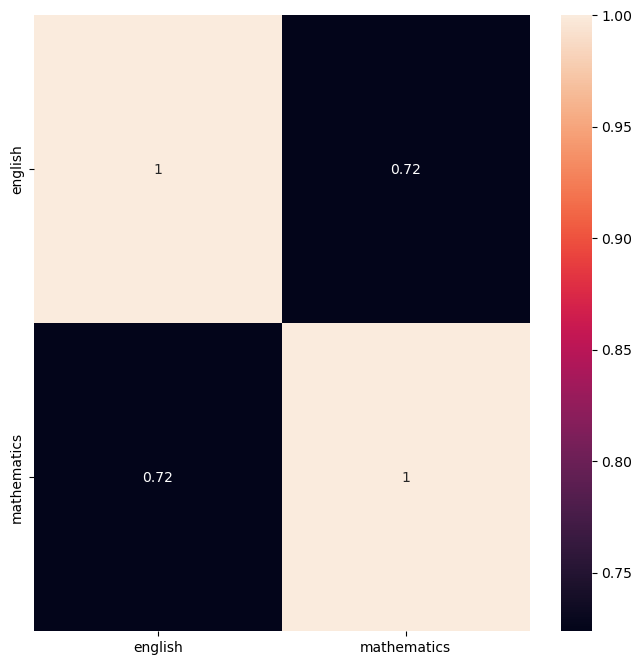

In [15]:
plt.figure(figsize = (8,8))
sns.heatmap(df[["english","mathematics"]].corr(), annot = True)

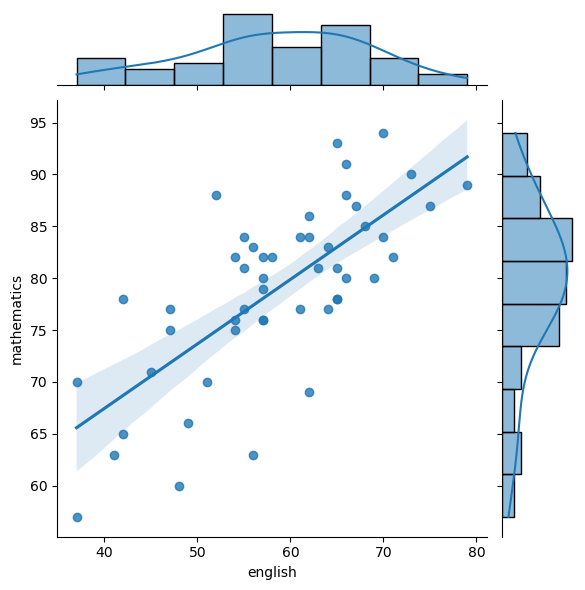

In [16]:
sns.jointplot(data =df, x = "english", y = "mathematics", kind = "reg")

#### 과제2_0411
상기 사용자 함수를 사용하여 샘플사이즈가 10, 20, 30이고 샘플 갯수가 각각 10000개인 3개의 데이터프레임을 생성 후 결합한 후 바이올린 플롯을 그려서 인사이트를 기술하시오.

In [5]:
from scipy import stats
population = stats.norm(loc = 4, scale = 0.8)
population.rvs(size = 10)

array([4.57445396, 4.79266437, 4.18057909, 4.14141139, 4.35680824,
       3.98962976, 3.79739373, 5.32819421, 3.69089452, 3.39019449])

In [6]:
# 사용자 함수(표본평균 계산)
def cal_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i] = population.rvs(size = size).mean()
    return sample_mean_array
np.mean(cal_sample_mean(size = 10, n_trial = 100))

3.9514598119317816

In [7]:
a = cal_sample_mean(10,10000)
b = cal_sample_mean(20,10000)
c = cal_sample_mean(30,10000)

In [8]:
dfa = pd.DataFrame(a)
dfb = pd.DataFrame(b)
dfc = pd.DataFrame(c)

In [9]:
df = pd.concat([dfa, dfb, dfc], axis = 1)
df.columns = ["10","20","30"]
df

,10,20,30
0,3.944859,3.976106,4.206895
1,3.956873,3.857566,4.032183
2,3.972080,4.138234,4.002536
3,4.203954,4.303868,4.010627
4,4.045971,4.270938,4.006841
...,...,...,...
9995,4.137100,4.026971,4.166952
9996,3.971750,3.915483,4.317325
9997,4.205728,3.883555,3.890548
9998,3.849034,3.957638,4.107045


<AxesSubplot:>

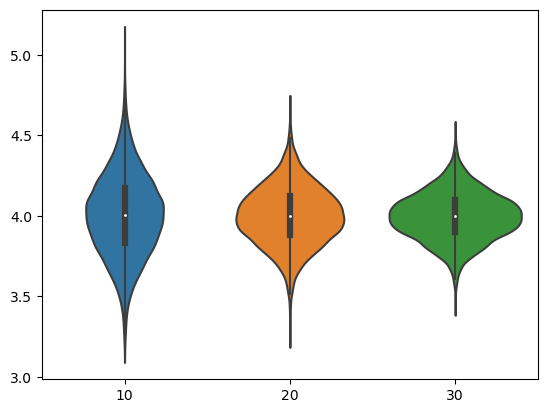

In [10]:
sns.violinplot(df)